In [1]:
import json
import copy
import numpy as np
import cv2
from base.utils.annotation_builder import AnnotationBuilder

In [2]:
ao = json.load(open('/home/andrea/Documents/Repositories/AIDA/dist/data/annotations/17_A047-4463_153D+-+2017-05-11+09.40.22_pre_shrunk.json'))

 epithelium num points: m243.0, s196.0 epithelium contour area: m75806.0, s133526.0
 lumen num points: m233.0, s230.0 lumen contour area: m50832.0, s96161.0



' epithelium num points: m243.0, s196.0 epithelium contour area: m75806.0, s133526.0\n lumen num points: m233.0, s230.0 lumen contour area: m50832.0, s96161.0\n'

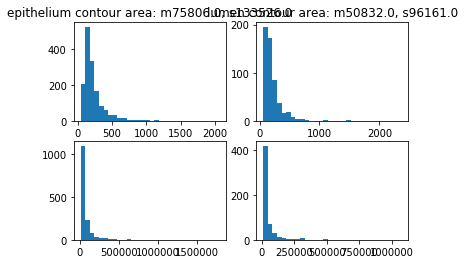

In [3]:
ab = AnnotationBuilder.from_object(ao)
ab.summary_plot(30)

 epithelium num points: m49.0, s39.0 epithelium contour area: m75029.0, s133053.0
 lumen num points: m47.0, s46.0 lumen contour area: m50302.0, s96202.0



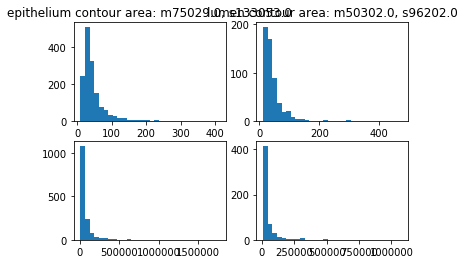

In [4]:
ab.shrink_paths(0.8)
ab.summary_plot(30)
ab.dump_to_json('/home/andrea/Documents/Repositories/AIDA/dist/data/annotations/', name='shrunk0')

In [5]:
new_layer = copy.deepcopy(ab._obj['layers'][0])
new_item = copy.deepcopy(new_layer['items'][0])

In [6]:
item_contour = np.array(list(ab.item_points(new_item))).astype(np.int32)[:, np.newaxis, :]  # contour functions only work on int32
x, y, w, h = cv2.boundingRect(item_contour)
point_density = (len(new_item['segments']) / 4) / np.sqrt(w*h) 
print(len(new_item['segments']), point_density)

237 0.18703046592797884


In [7]:
factor, min_point_density, min_point_num = 1.0, 0.1, 10
new_item = copy.deepcopy(new_layer['items'][0])
def pairwise(iterable):
    from itertools import tee
    "s -> (s0,s1), (s1,s2), (s2, s3), ..."
    a, b = tee(iterable)
    next(b, None)
    return zip(a, b)
if not (len(new_item['segments']) / 4) / np.sqrt(w*h) < min_point_density \
        and len(new_item['segments']) > min_point_num:
    new_len = round(len(new_item['segments']) * factor)  # length of new element after point removal
    # distances from smallest to greatest, with index of first point along contour
    indexed_distances = sorted(((j, ab.euclidean_dist(p1, p2))
                                for j, (p1, p2) in enumerate(pairwise(ab.item_points(new_item)))),
                               key=lambda indexed_el: indexed_el[1])
    # reorder so that first eliminated point is last in the list,
    # so that index of next point is preserved
    indexed_distances = sorted(indexed_distances, key=lambda indexed_el: indexed_el[0], reverse=True)
    print(len(new_item['segments']))
    for idx, dist in indexed_distances[0:(len(new_item['segments']) - new_len)]:
        del new_item['segments'][idx]
print(len(new_item['segments']))

237
237


In [8]:
indexed_distances = sorted(((j, ab.euclidean_dist(p1, p2))
                            for j, (p1, p2) in enumerate(pairwise(ab.item_points(new_item)))),
                           key=lambda indexed_el: indexed_el[1])

In [10]:
print(indexed_distances[0:100])

[(31, 1.0), (46, 1.0), (58, 1.0), (68, 1.0), (72, 1.0), (74, 1.0), (83, 1.0), (86, 1.0), (102, 1.0), (105, 1.0), (187, 1.0), (207, 1.0), (36, 1.4142135623730951), (39, 1.4142135623730951), (50, 1.4142135623730951), (52, 1.4142135623730951), (59, 1.4142135623730951), (69, 1.4142135623730951), (71, 1.4142135623730951), (75, 1.4142135623730951), (84, 1.4142135623730951), (87, 1.4142135623730951), (94, 1.4142135623730951), (123, 1.4142135623730951), (161, 1.4142135623730951), (186, 1.4142135623730951), (193, 1.4142135623730951), (15, 2.23606797749979), (16, 2.23606797749979), (18, 2.23606797749979), (30, 2.23606797749979), (55, 2.23606797749979), (62, 2.23606797749979), (64, 2.23606797749979), (65, 2.23606797749979), (76, 2.23606797749979), (77, 2.23606797749979), (88, 2.23606797749979), (89, 2.23606797749979), (91, 2.23606797749979), (92, 2.23606797749979), (106, 2.23606797749979), (107, 2.23606797749979), (121, 2.23606797749979), (122, 2.23606797749979), (140, 2.23606797749979), (141, 2.